In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind
import sklearn
from sklearn.metrics import mean_squared_error

In [6]:
cultivos = pd.read_csv("../EDA/tipo_cultivo.csv")

In [20]:
data = pd.read_csv("emprendimientos.csv")

## Correlaciones

Hay correlación entre el contenido de potasio y de fósforo?

In [14]:
correlation_pot_fos = cultivos['Contenido_de_Potasio'].corr(cultivos['Contenido_de_Fosforo'])
print(f"Correlación entre potasio y fósforo: {correlation_pot_fos}")

Correlación entre potasio y fósforo: 0.7362322172446614


Tomo las columnas numéricas para hacer la correlación

In [23]:
data_new_numericas = data_new[[
    'RnD_Expenditure',
    'Admin_Costs',
    'Marketing_Expenditure',
    'Net_Profit', 
    'Profit',
    'Operational_Cost',
    'Employee_Count'
]]
data_new_numericas.corr()

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Net_Profit,Profit,Operational_Cost,Employee_Count
RnD_Expenditure,1.000000,0.144450,0.441441,0.536140,0.624638,0.464026,0.061373
Admin_Costs,0.144450,1.000000,0.002806,0.030645,0.076751,0.295399,0.155882
Marketing_Expenditure,0.441441,0.002806,1.000000,0.332763,0.370202,0.956199,-0.145717
Net_Profit,0.536140,0.030645,0.332763,1.000000,0.991393,0.326885,0.016218
Profit,0.624638,0.076751,0.370202,0.991393,1.000000,0.376149,0.025882
Operational_Cost,0.464026,0.295399,0.956199,0.326885,0.376149,1.000000,-0.093585
Employee_Count,0.061373,0.155882,-0.145717,0.016218,0.025882,-0.093585,1.000000


Heatmap de las correlaciones de las columnas numéricas

In [ ]:
plt.figure(figsize = (7,7))
numeric_cols = data.select_dtypes(include=[float, int])
sns.heatmap(round(numeric_cols.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12})

## OneHotEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Hace una columna para cada tipo de cultivo

In [ ]:
tipocultivo_ohe = OneHotEncoder(sparse=False)
tipocultivo_ohe.fit(data_corr[["Tipo_de_Cultivo"]])
tipocultivo_ohe.categories_

Graficamos el heatmap de las correlaciones

In [ ]:
data_corr["apple"], data_corr["banana"] ,data_corr["blackgram"],data_corr["chickpea"],data_corr["coconut"],data_corr["coffee"],data_corr["cotton"],data_corr["grapes"], data_corr["jute"] ,data_corr["kidneybeans"],data_corr["lentil"],data_corr["maize"],data_corr["mango"],data_corr["mothbeans"],data_corr["mungbean"], data_corr["muskmelon"] ,data_corr["orange"],data_corr["papaya"],data_corr["pigeonpeas"],data_corr["pomegranate"],data_corr["rice"],data_corr["watermelon"] = tipocultivo_ohe.fit_transform(data_corr[["Tipo_de_Cultivo"]]).T
data_corr.drop(columns="Tipo_de_Cultivo", inplace=True)
plt.figure(figsize = (20, 10))
sns.heatmap(round(data_corr.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size": 10})

## T test P value

In [9]:
rice = cultivos[cultivos["Tipo_de_Cultivo"] == "rice"]

coffee = cultivos[cultivos["Tipo_de_Cultivo"] == "coffee"]

H0: no hay diferencias significativas entre el contenido de potasio de los suelos que cultivan arroz y los que cultivan café --> hipótesis nula (que las dos muestras son iguales)

In [17]:
t_stat, p_value = ttest_ind(rice["Contenido_de_Potasio"], coffee["Contenido_de_Potasio"])

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa de de contenido de potasio entre los cultivos arroz y café.")
    print(p_value)
    print(t_stat)
else:
    print("No rechazar la hipótesis nula.")

Rechazar la hipótesis nula. Hay una diferencia significativa de de contenido de potasio entre los cultivos arroz y café.
7.221964148719214e-57
22.649215142757964


t_stat: Este es el valor del estadístico t calculado durante la prueba. Representa cuánto difieren las medias de las dos muestras.

p_value: Este es el valor p obtenido del test. Indica la probabilidad de observar los datos si la hipótesis nula (que las dos muestras son iguales) es verdadera. Un valor de p bajo sugiere evidencia contra la hipótesis nula.

## Regresión lineal

In [22]:
data_new = data.drop(['Unnamed: 0'], axis=1)

**Regresión con variables numéricas**

In [24]:
model = smf.ols(formula = "Net_Profit ~ RnD_Expenditure + Admin_Costs + Marketing_Expenditure + Employee_Count + Operational_Cost", data = data_new)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Profit   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     6.985
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           9.67e-05
Time:                        23:30:08   Log-Likelihood:                -842.48
No. Observations:                  70   AIC:                             1695.
Df Residuals:                      65   BIC:                             1706.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6.535e+04   1.94e+04      3.369      0.001    2.66e+04    1.04e+05
RnD_Expenditure           0.5156      0.124      4.149      0.000       0.267       0.764
Admin_Costs              -0.0497      0.088     -0.562      0.576      -0.226       0.127
Marketing_Expenditure     0.0473      0.052      0.909      0.367      -0.057       0.151
Employee_Count            3.4692     37.252      0.093      0.926     -70.929      77.868
Operational_Cost         -0.0023      0.047     -0.050      0.960      -0.096       0.091
==============================================================================
Omnibus:                       29.441   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.449
Skew:                          -1.322   Prob(JB):                     1.85e-16
Kurtosis:                       7.225   Cond. No.                     1.36e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.49e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

En este caso, el r cuadrado es 0.301, lo que significa que aproximadamente el 30,1% de la variabilidad en "Net_Profit" puede ser explicada por las variables independientes incluidas en el modelo, se considera un r cuadrado bajo.

El valor del estadístico F es 6.985, y el valor p asociado (Prob (F-statistic)) es 9.67e-05, lo que indica que al menos una de las variables independientes es significativa en la predicción de "Net_Profit".

**Regresión con variables categóricas**

Al pasar una variable categórica, statsmodel usa la primera variable como referencia.
El intercepto es igual a la media de la referencia (aquí origen==europa)
Cada coeficiente corresponde a la diferencia con la media de la referencia

In [40]:
model2 = smf.ols(formula="Net_Profit ~  C(Industry_Sector)+ C(Investment_Round)+ C(Location)", data=data_new)
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Profit   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.205
Date:                Sun, 26 Nov 2023   Prob (F-statistic):              0.307
Time:                        23:53:52   Log-Likelihood:                -848.49
No. Observations:                  70   AIC:                             1719.
Df Residuals:                      59   BIC:                             1744.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         7.984e+04   2.48e+04      3.222      0.002    3.03e+04    1.29e+05
C(Industry_Sector)[T.Finance]     3.292e+04   2.07e+04      1.588      0.118   -8572.215    7.44e+04
C(Industry_Sector)[T.Healthcare] -6291.8788   1.89e+04     -0.332      0.741   -4.42e+04    3.16e+04
C(Industry_Sector)[T.Retail]      6532.8956   2.13e+04      0.306      0.761   -3.62e+04    4.92e+04
C(Industry_Sector)[T.Tech]        2.241e+04   1.89e+04      1.187      0.240   -1.54e+04    6.02e+04
C(Investment_Round)[T.Seed]       4045.9862   2.35e+04      0.172      0.864    -4.3e+04    5.11e+04
C(Investment_Round)[T.Series A]   3.234e+04    3.3e+04      0.979      0.332   -3.38e+04    9.85e+04
C(Investment_Round)[T.Series B]   3.529e+04   2.72e+04      1.296      0.200   -1.92e+04    8.98e+04
C(Investment_Round)[T.Series C]   2.021e+04   2.68e+04      0.753      0.454   -3.35e+04    7.39e+04
C(Location)[T.Florida]            5942.5834   1.64e+04      0.362      0.719   -2.69e+04    3.88e+04
C(Location)[T.New York]           6784.2221   1.52e+04      0.445      0.658   -2.37e+04    3.73e+04
==============================================================================
Omnibus:                        3.067   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.008
Skew:                          -0.203   Prob(JB):                        0.366
Kurtosis:                       2.276   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Rcuadrado=1
 el mejor de los casos donde el objetivo se explica al 100% por las características
Rcuadrado =0
Es la media
Rcuadrado <0
 puede existir y, en el peor de los casos, ¡predecir la media sería incluso mejor que ejecutar un modelo
lineal!

### Residuos

Calculamos los valores predichos y el residuo

In [27]:
modelo1 = data_new.copy()
modelo1["pred"] = model.predict(modelo1[["RnD_Expenditure", "Admin_Costs", "Marketing_Expenditure", "Employee_Count", "Operational_Cost"]])
modelo1["dif"] = modelo1["Net_Profit"] - modelo1["pred"]

In [28]:
modelo1["EC"] = (modelo1["Net_Profit"] - modelo1["pred"])**2
print(f"El error cuadrático de este modelo 1 es {modelo1.EC.mean()}")

El error cuadrático de este modelo 1 es 1665028653.0206966


In [32]:
sklearn.metrics.mean_absolute_percentage_error(modelo1["Net_Profit"], modelo1["pred"])

0.6892080397117675

El Mean Absolute Percentage Error (MAPE) del primer modelo es de 0.6892080397117675: indica que, en promedio, las predicciones del modelo tienen un error absoluto del 68.92%, un error extremadamente alto. Tiene sentido ya que el p value de la mayoria de las variables es alto.

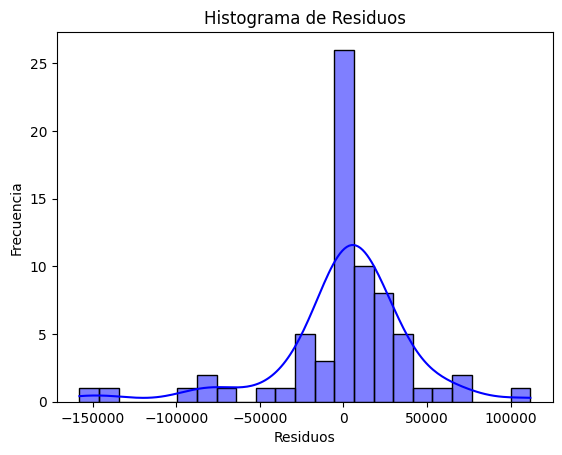

In [33]:
sns.histplot(modelo1["dif"], kde=True, color='blue')

# Personaliza el gráfico
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')

# Muestra el gráfico
plt.show()

<Axes: xlabel='Net_Profit', ylabel='dif'>

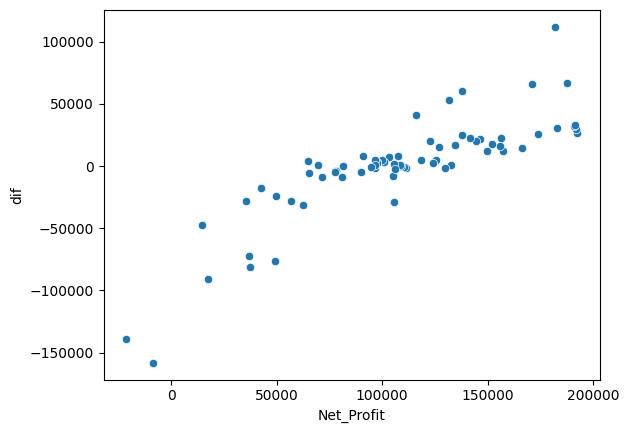

In [38]:
sns.scatterplot(x=modelo1["Net_Profit"], y=modelo1["dif"])

El modelo de predicción es en general preciso, ya que la mayoría de los puntos se encuentran cerca de la línea diagonal de referencia.
Sin embargo, hay algunos puntos que se encuentran alejadas de la línea, lo que indica que el modelo no es perfecto.
Los puntos que se encuentran alejadas de la línea diagonal se encuentran principalmente en los extremos del gráfico, lo que indica que el modelo puede tener dificultades para predecir ganancias muy altas o muy bajas.

## ANOVA

In [37]:
# Realizar pruebas estadísticas para comparar los sectores.
from scipy.stats import f_oneway

sectors = data_new['Industry_Sector'].unique()
sector_data = [data_new[data_new['Industry_Sector'] == sector]['Net_Profit'] for sector in sectors]

# Realizar un análisis de varianza (ANOVA) para verificar si existen diferencias significativas.
f_statistic, p_value = f_oneway(*sector_data)
print(f'Estadística F: {f_statistic}')
print(f'Valor p: {p_value}')

Estadística F: 1.7135362927526463
Valor p: 0.15768887798901582


Un valor p bajo (generalmente menos de 0.05) sugiere que al menos un grupo es significativamente diferente de los otros en términos de la variable medida.

En el contexto de un ANOVA, el valor de la estadística F se utiliza para evaluar si hay diferencias significativas entre las medias de los grupos. Para interpretar este valor de F, es esencial considerar el tamaño del mismo en relación con un umbral crítico.

## Random Forest

## Gregors

### RF for importance cols

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = df_model.drop('conversion', axis=1)
y = df_model['conversion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = rf.feature_importances_

# Crear un DataFrame para las importancias de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Seleccionar las características más importantes (por ejemplo, las 10 más importantes)
top_features = feature_importance_df['Feature'][:10].tolist()

print("Top 10 features:", top_features)


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred_prob = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Curva ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import shap

# Inicializar el explainer de SHAP
explainer = shap.TreeExplainer(rf)

# Calcular los SHAP values para todas las muestras en el conjunto de prueba
shap_values = explainer.shap_values(X_test)

# Visualizar el primer prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

# Visualizar el resumen para todo el conjunto de prueba
shap.summary_plot(shap_values[1], X_test)

## Regresión logística

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as  np

Le pongo un id a cada tipo de cultivo

In [ ]:
data_modelos['id_cultivo'] = pd.factorize(data_modelos['Tipo_de_Cultivo'])[0]

Puedo ver qué id es cada cultivo con este código

In [ ]:
data_modelos[["id_cultivo", "Tipo_de_Cultivo"]].drop_duplicates()

Separo Y y X

In [ ]:
X = data_modelos.drop(["id_cultivo","Tipo_de_Cultivo"], axis=1)  # DataFrame con características
y = data_modelos['id_cultivo']  # Serie con etiquetas

Separo train y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31415)

Ejecuto la regresión

In [ ]:
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit(method="bfgs")
stats1=result.summary()

print(stats1)

Matriz de confusión

In [ ]:
y_pred = result.predict(sm.add_constant(X_test))
y_pred_labels = np.argmax(y_pred.values, axis=1)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Accuracy: {accuracy}')

# Display other classification metrics
print(classification_report(y_test, y_pred_labels))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
print('Confusion Matrix:')
# print(cm)

# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

## Árbol de decisión

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

Le pongo un id a cada tipo de cultivo

In [ ]:
data_modelos['id_cultivo'] = pd.factorize(data_modelos['Tipo_de_Cultivo'])[0]

Puedo ver qué id es cada cultivo con este código

In [ ]:
data_modelos[["id_cultivo", "Tipo_de_Cultivo"]].drop_duplicates()

Separo Y y X

In [ ]:
X = data_modelos.drop(["id_cultivo","Tipo_de_Cultivo"], axis=1)  # DataFrame con características
y = data_modelos['id_cultivo']  # Serie con etiquetas

Separo train y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31415)

Ejecuto el árbol

In [ ]:
# Crear el modelo
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=2,
max_depth=5)
decision_tree_model.fit(X_train, y_train)
# Validación cruzada
score = cross_val_score(decision_tree_model, X, y, cv=5)
print('Puntuación de validación cruzada:', score)
# Precisión en entrenamiento
dt_train_accuracy = decision_tree_model.score(X_train, y_train)
print("Precisión en entrenamiento =", dt_train_accuracy)
# Precisión en pruebas
dt_test_accuracy = decision_tree_model.score(X_test, y_test)
print("Precisión en pruebas =", dt_test_accuracy)
# Matriz de confusión
y_pred = decision_tree_model.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_true, y_pred)
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()